# Analysis

In [1]:
import os
import random
import re
import sys
import operator
import statistics
import string
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import spacy
import numpy as np
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import preprocessing as prepro, util, layers, tokenizer


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
train_raw_path = '../data/raw/squad_v1/train-v1.1.json'
dev_raw_path = '../data/raw/squad_v1/dev-v1.1.json'
embeddings_path = '../data/embeddings/glove.840B.300d.txt'

# Text Composition

In [3]:
embedding_index = util.read_embeddings_file(embeddings_path)
vocab = set([e for e, _ in embedding_index.items()])

In [4]:
tokenizer = tokenizer.Tokenizer(max_words=150000 + 1,
                           max_chars=2500 + 1,
                           vocab=vocab,
                           lower=False,
                           oov_token='<OOV>',
                           trainable_words=['<OOV>'],
                           filters=None)

In [5]:
train_contexts, train_answers, tokenizer = prepro.fit_and_extract(train_raw_path, tokenizer)
dev_contexts, dev_answers, tokenizer = prepro.fit_and_extract(dev_raw_path, tokenizer, skip_on_errors=False)

  0%|▎                                                                            | 408/87599 [00:02<10:29, 138.49it/s]

Cannot find exact answer in text for question id 56d4baf92ccc5a1400d8317f


 16%|███████████▋                                                               | 13680/87599 [01:35<08:34, 143.72it/s]

Cannot find exact answer in text for question id 56df85525ca0a614008f9bfe
Cannot find answer span for question id 56df85525ca0a614008f9bfe


 16%|███████████▊                                                               | 13728/87599 [01:35<08:33, 143.73it/s]

Cannot find answer span for question id 56df8ce34a1a83140091eb26


 16%|███████████▊                                                               | 13862/87599 [01:36<08:33, 143.68it/s]

Cannot find exact answer in text for question id 56dfb5977aa994140058e02e
Cannot find answer span for question id 56dfb5977aa994140058e02e


 40%|█████████████████████████████▋                                             | 34640/87599 [03:58<06:04, 145.37it/s]

Cannot find exact answer in text for question id 571006d0b654c5140001f750


100%|███████████████████████████████████████████████████████████████████████████| 87599/87599 [09:41<00:00, 150.71it/s]


Total: 87599
Total Answers: 87596
Total Skipped: 3


 95%|███████████████████████████████████████████████████████████████████████▍   | 10063/10570 [01:06<00:03, 151.77it/s]

Cannot find exact answer in text for question id 5730b10b8ab72b1400f9c6a0


100%|███████████████████████████████████████████████████████████████████████████| 10570/10570 [01:09<00:00, 151.67it/s]


Total: 10570
Total Answers: 10570
Total Skipped: 0


## Basic stats

In [14]:
word_counts = tokenizer.word_counter
total_words = sum(word_counts.values())
unique_words = len(word_counts)
words_in_vocab = [word for word, count in word_counts.items() if word in vocab]
words_out_of_vocab = [word for word, count in word_counts.items() if word not in vocab]

In [15]:
tokenizer.init()

In [8]:
total_words

4005075

In [9]:
len(words_in_vocab)

91733

In [10]:
len(words_out_of_vocab)

13881

In [11]:
oov_counter = Counter()

for word in words_out_of_vocab:
    oov_counter[word] = tokenizer.word_counter[word]

oov_counter.most_common()

[("Qur'an", 35),
 ('X.25', 33),
 ('Jamukha', 32),
 ('IHDI', 25),
 ('Deshin', 23),
 ('Güshi', 23),
 ('Autodidactus', 21),
 ('Shekpa', 21),
 ('Tugh', 20),
 ('Toghrul', 19),
 ('Khwarezmia', 15),
 ("Bahá'í", 15),
 ('Changchub', 15),
 ('Shtokavian', 15),
 ('cydippids', 15),
 ('Nederrijn', 15),
 ('cydippid', 14),
 ('Plastoglobuli', 13),
 ('assention', 13),
 ('Nukufetau', 13),
 ("ta'wil", 12),
 ('Xeer', 12),
 ('Trías', 12),
 ('Khanbaliq', 12),
 ('pyrenoids', 12),
 ('clitellates', 12),
 ('Börte', 12),
 ('Céloron', 12),
 ('tentilla', 11),
 ('avialans', 11),
 ('Belavezha', 11),
 ('Tianze', 11),
 ('Aavik', 11),
 ('Slavism', 11),
 ('..', 11),
 ('Argentoratum', 11),
 ('granal', 11),
 ('Rus’', 11),
 ('Phagmodru', 11),
 ('Sheptycki', 11),
 ('ARCUK', 10),
 ('stemmatic', 10),
 ('Sclaveni', 10),
 ('Jonassohn', 10),
 ('Phagpa', 10),
 ('Khwarezmian', 10),
 ('Kilbracken', 10),
 ('Netbula', 10),
 ('shōen', 10),
 ('Malyarchuk', 10),
 ('Guofan', 10),
 ('mitrailleuse', 10),
 ('CPPCG', 10),
 ('preaspirated', 10

In [18]:
[words_out_of_vocab[i] for i in random.sample(range(len(words_out_of_vocab)), 50)]

['Zongtang',
 'Antić',
 'Rissaldar',
 'pʰøʔ˨˧˨',
 'Dōkyō',
 'Kecheek',
 'Tenkyong',
 'Lepidodinium',
 'Zoige',
 'Karlén',
 'němъ',
 'Kelisiano',
 'creuseurs',
 'Sclaveni',
 '^7',
 'Virarajendra',
 'Dehery',
 'Apellōn',
 'kunigai',
 'systhpop',
 'Chorene',
 'majja',
 'LC18',
 'reformilate',
 'cenutry',
 'Boleroroyals',
 'κανὠν',
 "Shī'a",
 'Palewski',
 'Tuindorp',
 'ἀ',
 'Trakhtenbrot',
 '879.3',
 'Российская',
 'Āgamas',
 'Mariña',
 'states.4',
 'Brosamer',
 '/ˈhænəvər/',
 'Jacksonvillians',
 '593.1/km²',
 'nanmetres',
 'Kashafrud',
 'Sáinz',
 'Wesoła',
 'fə',
 '朱弘桓',
 'Bonut',
 'wallpaint',
 'Kampaku']

In [19]:
date = re.compile("(?:(?:(?:(?:(?<!:)\\b\\'?\\d{1,4},? ?)?\\b(?:[Jj]an(?:uary)?|[Ff]eb(?:ruary)?|[Mm]ar(?:ch)?|[Aa]pr(?:il)?|May|[Jj]un(?:e)?|[Jj]ul(?:y)?|[Aa]ug(?:ust)?|[Ss]ept?(?:ember)?|[Oo]ct(?:ober)?|[Nn]ov(?:ember)?|[Dd]ec(?:ember)?)\\b(?:(?:,? ?\\'?)?\\d{1,4}(?:st|nd|rd|n?th)?\\b(?:[,\\/]? ?\\'?\\d{2,4}[a-zA-Z]*)?(?: ?- ?\\d{2,4}[a-zA-Z]*)?(?!:\\d{1,4})\\b))|(?:(?:(?<!:)\\b\\'?\\d{1,4},? ?)\\b(?:[Jj]an(?:uary)?|[Ff]eb(?:ruary)?|[Mm]ar(?:ch)?|[Aa]pr(?:il)?|May|[Jj]un(?:e)?|[Jj]ul(?:y)?|[Aa]ug(?:ust)?|[Ss]ept?(?:ember)?|[Oo]ct(?:ober)?|[Nn]ov(?:ember)?|[Dd]ec(?:ember)?)\\b(?:(?:,? ?\\'?)?\\d{1,4}(?:st|nd|rd|n?th)?\\b(?:[,\\/]? ?\\'?\\d{2,4}[a-zA-Z]*)?(?: ?- ?\\d{2,4}[a-zA-Z]*)?(?!:\\d{1,4})\\b)?))|(?:\\b(?<!\\d\\.)(?:(?:(?:[0123]?[0-9][\\.\\-\\/])?[0123]?[0-9][\\.\\-\\/][12][0-9]{3})|(?:[0123]?[0-9][\\.\\-\\/][0123]?[0-9][\\.\\-\\/][12]?[0-9]{2,3}))(?!\\.\\d)\\b))")
money = re.compile("(?:[$€£¢]\d+(?:[\.,']\d+)?(?:[MmKkBb](?:n|(?:il(?:lion)?))?)?)|(?:\d+(?:[\.,']\d+)?[$€£¢])")
url = re.compile(r'^(https?://)?(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+[A-Z]{2,6}\.?)(?:/?|[/?]\S+)$', re.IGNORECASE)
numbers = re.compile("[-+]?([\d]+[.\d]*)")
punct = re.compile("[^\w\s.]")
non_english_chars = re.compile("[^\u0000-\u007F]+")


def word_stats(oov_words, word_counter):
    """ Retrieves OOV word occurrence + calculates OOV basic statistics. """
    word_counts = {}
    occurrences = Counter()
    
    for word in oov_words:
        word_count = word_counter[word]
        word_counts[word] = word_count
        occurrences[str(word_count)] += 1
        
    
    occurrences = [int(count) for count in occurrences.keys()]
    
    min_occur = min(occurrences)
    max_occur = max(occurrences)
    median = statistics.median(occurrences)
    mean = statistics.mean(occurrences)
    
    stats = (min_occur, max_occur, median, mean, )
    
    return word_counts, stats

def word_breakdown(word_counts):
    """ Provides a limited breakdown of percentage of words that are dates/money/urls/numbers/non-english/english. """
    unique_counts = Counter()
    occurrence_counts = Counter()

    for word, count in word_counts.items():
        if date.match(word) is not None:
            unique_counts['date'] += 1
            occurrence_counts['date'] += count
        elif money.match(word) is not None:
            unique_counts['money'] += 1
            occurrence_counts['money'] += count
        elif url.match(word) is not None:
            unique_counts['urls'] += 1
            occurrence_counts['urls'] += count
        elif numbers.match(word) is not None:
            unique_counts['numbers'] += 1
            occurrence_counts['numbers'] += count
        elif punct.match(word) is not None:
            unique_counts['punct'] += 1
            occurrence_counts['punct'] += count
        elif non_english_chars.match(word) is not None:
            unique_counts['word_non_eng'] += 1
            occurrence_counts['word_non_eng'] += count
        else:
            unique_counts['word_ascii_chars'] += 1
            occurrence_counts['word_ascii_chars'] += count
            
    assert sum(word_counts.values()) == sum(occurrence_counts.values())

    return unique_counts, occurrence_counts

def piechart(word_counts, fig_size=(15, 8), title=''):
    fig1, ax1 = plt.subplots(figsize=fig_size)

    counts = np.array(list(word_counts.values()), dtype=np.int32)
    percent = 100. * counts / counts.sum()
    
    colors = ['red', 'lightskyblue', 'gainsboro', 'lightseagreen', 'cornflowerblue', 'darkgreen',]
    
    wedges, texts = ax1.pie(counts, startangle=90, radius=1.5, colors=colors)

    ax1.axis('equal') 

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(word_counts.keys(), percent)]

    wedges, labels, dummy =  zip(*sorted(zip(wedges, labels, counts),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(wedges, labels, loc='center left', fontsize=12)

    plt.title(title)
    plt.show()

## Word Analysis
No surprises or interesting features which warrent further investigation, 98% of word occurrences are either english words or punctuation. Generally, numbers, urls, dates and words with non-english characters appear infrequently to the point where they are mostly unique (As shown by difference of percentage from unique words vs occurrence).

In [20]:
vocab_counts, vocab_stats = word_stats(words_in_vocab, tokenizer.word_counter)

In [21]:
vocab_stats

(1, 238437, 573, 2373.178603807797)

In [22]:
unique_vocab_counts, occurrence_vocab_counts = word_breakdown(vocab_counts)

In [23]:
unique_vocab_counts

Counter({'date': 5,
         'numbers': 5422,
         'punct': 87,
         'urls': 49,
         'word_ascii_chars': 86015,
         'word_non_eng': 155})

In [24]:
occurrence_vocab_counts

Counter({'date': 6,
         'numbers': 80952,
         'punct': 421169,
         'urls': 88,
         'word_ascii_chars': 3482577,
         'word_non_eng': 485})

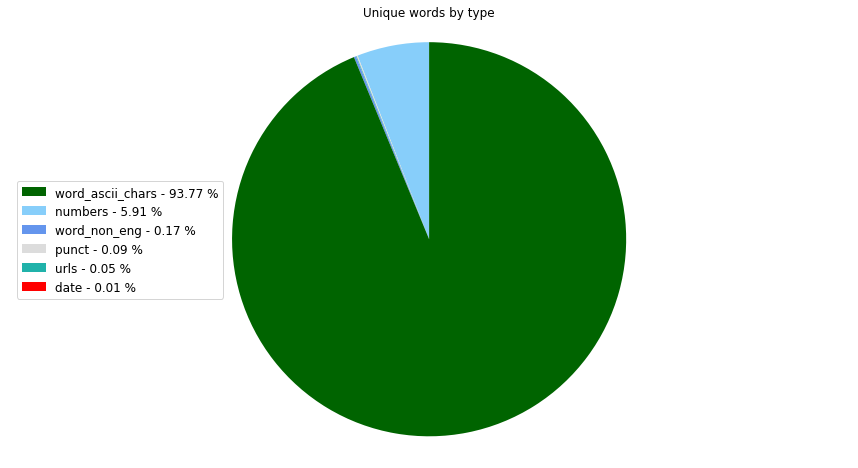

In [27]:
piechart(unique_vocab_counts, title='Unique words by type')

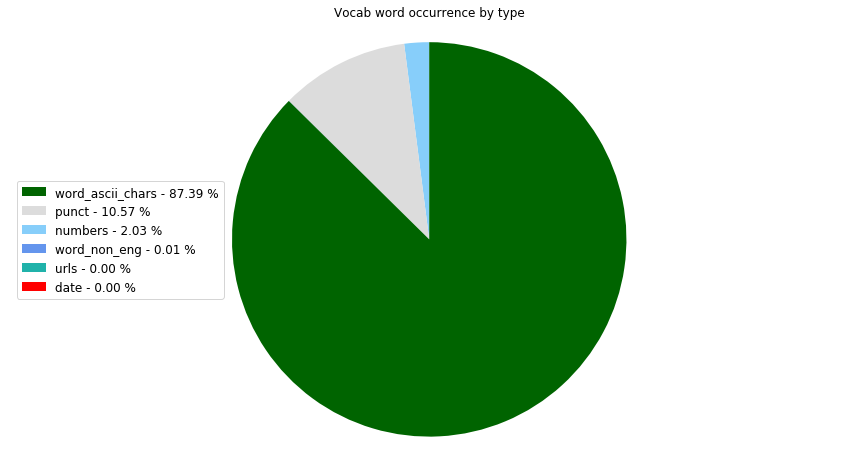

In [26]:
piechart(occurrence_vocab_counts, title='Word occurrence by type')

## OOV Analysis

As to be expected, OOVs are mostly rare words that occur infrequently with words containing non-english characters making up a higher proportion of the OOV (out of vocabulary) counts than the words in the vocabulary. Big difference being we have a mostly uniform count distribution which is consistent with the idea that these are rare tokens that don't appear outside of more than a few contexts. As well as this, URLs, numbers and currency have low overall counts so if action is taken (e.g replace oov numbers with their own token <number>) there will be minimal positive impact.

In [72]:
oov_counts, oov_stats = word_stats(words_out_of_vocab, tokenizer.word_counter)

In [73]:
oov_stats

(1, 35, 12, 14.26086956521739)

In [74]:
len(oov_counts)

13881

In [75]:
sorted(oov_counts.items(), key=operator.itemgetter(1), reverse=True)[:25]  # Top 25 most common OOVS

[("Qur'an", 35),
 ('X.25', 33),
 ('Jamukha', 32),
 ('IHDI', 25),
 ('Güshi', 23),
 ('Deshin', 23),
 ('Shekpa', 21),
 ('Autodidactus', 21),
 ('Tugh', 20),
 ('Toghrul', 19),
 ('Shtokavian', 15),
 ('Nederrijn', 15),
 ('cydippids', 15),
 ('Khwarezmia', 15),
 ('Changchub', 15),
 ("Bahá'í", 15),
 ('cydippid', 14),
 ('Nukufetau', 13),
 ('Plastoglobuli', 13),
 ('assention', 13),
 ('Khanbaliq', 12),
 ('Xeer', 12),
 ("ta'wil", 12),
 ('pyrenoids', 12),
 ('Börte', 12)]

In [185]:
unique_counts, occurrence_counts = word_breakdown(oov_counts)

In [186]:
unique_counts

Counter({'date': 7,
         'money': 8,
         'numbers': 1216,
         'punct': 324,
         'urls': 42,
         'word_ascii_chars': 10984,
         'word_non_eng': 1300})

In [187]:
occurrence_counts

Counter({'date': 9,
         'money': 9,
         'numbers': 1360,
         'punct': 429,
         'urls': 54,
         'word_ascii_chars': 16443,
         'word_non_eng': 1494})

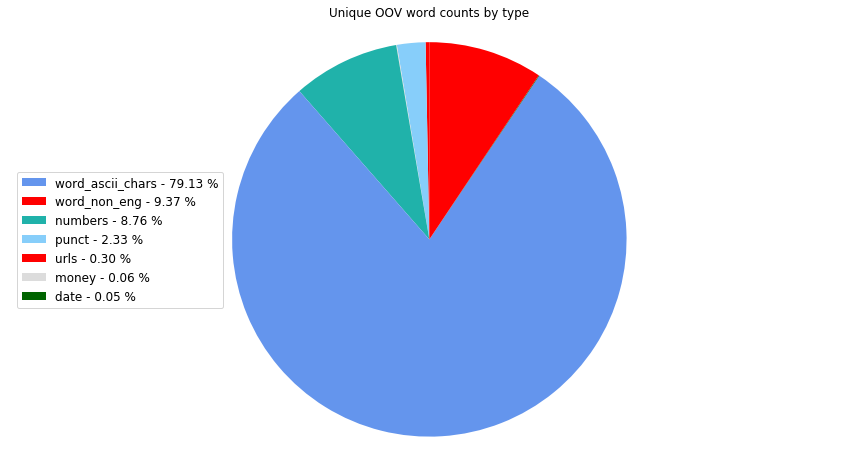

In [216]:
piechart(unique_counts, title='Unique OOV word counts by type')

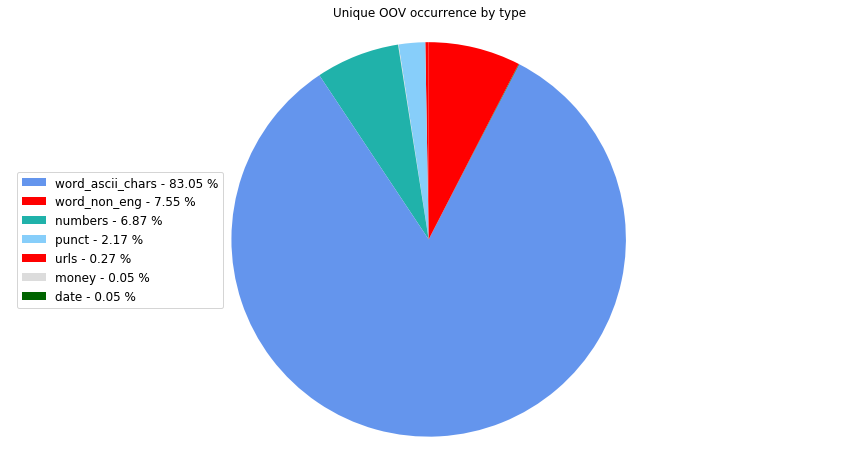

In [199]:
piechart(occurrence_counts, title='Unique OOV occurrence by type')

## Context, Question and Answer Lengths

In [201]:
def bar(title, counter, fig_size=(80, 10), tick_font=10):
    fig = plt.figure(figsize=fig_size, dpi=180, facecolor='w', edgecolor='k')
    top = dict(sorted(counter.items(), key=operator.itemgetter(1), reverse=True)[0:400])
    plt.bar(range(len(top)), top.values(), align='center', width=0.7)
    plt.xticks(range(len(top)), sorted([int(key) for key in top.keys()]), fontsize=tick_font)
    plt.xlabel('Length', fontsize=15)
    plt.ylabel('Occurrence', fontsize=15)
    plt.title(title)

    plt.show()
    
def stats(counter):
    lengths = [int(key) for key in counter.keys()]
    min_length = min(lengths)
    max_length = max(lengths)
    median = statistics.median(lengths)
    mean = statistics.mean(lengths)
    return min_length, max_length, median, mean
    
def count(data, token_key='length'):
    counter = Counter()
    for key, value in data.items():
        length = data[key][token_key]
        counter[str(length)] += 1
    return counter

def count_answer_lengths(data):
    counter = Counter()
    for key, value in data.items():
        start = data[key]['answer_starts']
        end = data[key]['answer_ends']
        length = end - start
        counter[str(length)] += 1
    return counter

In [202]:
train_context_lengths = count(train_contexts)
dev_context_lengths = count(dev_contexts)
train_question_lengths = count(train_answers)
dev_question_lengths = count(dev_answers)
train_answer_lengths = count_answer_lengths(train_answers)
dev_answer_lengths = count_answer_lengths(dev_answers)

## Context / Question / Answer Lengths

### Contexts

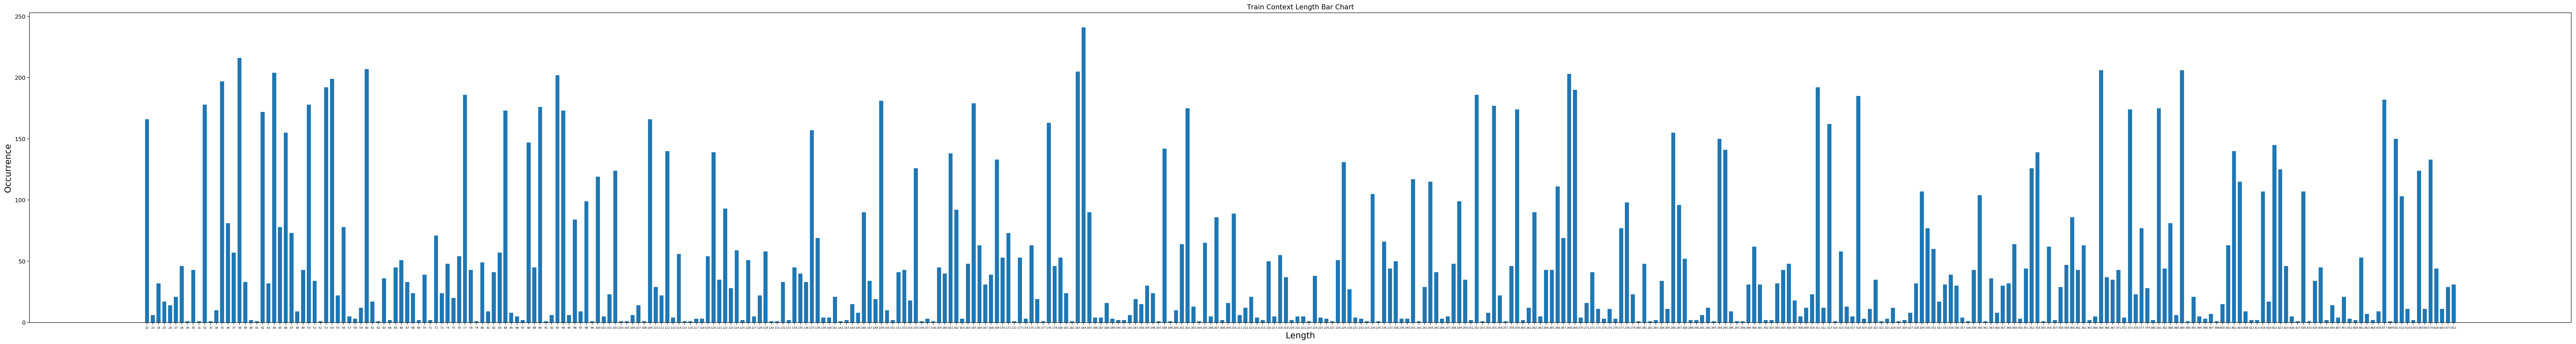

In [203]:
bar('Train Context Length', train_context_lengths, tick_font=5)

In [217]:
train_contexts_stats = stats(train_context_lengths)
train_contexts_stats

(22, 811, 222, 230.50872817955113)

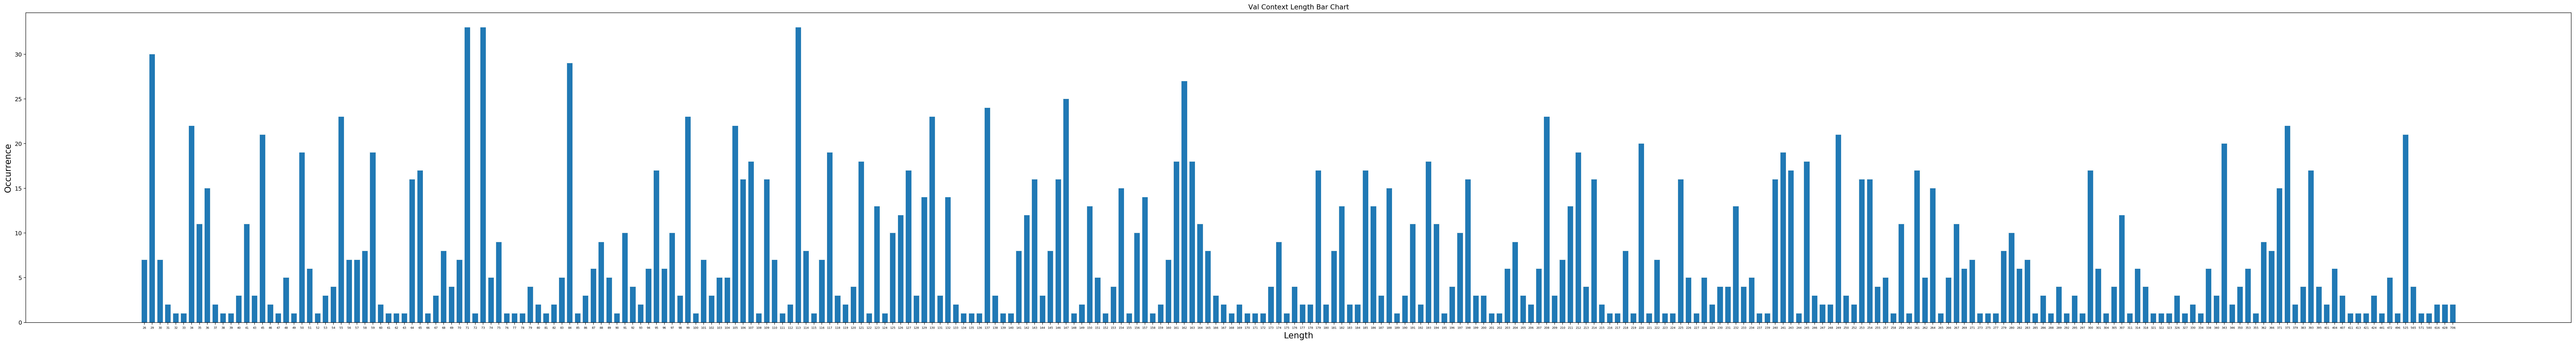

In [10]:
bar('Dev Context Length', dev_context_lengths, tick_font=5)

In [218]:
dev_contexts_stats = stats(dev_context_lengths)
dev_contexts_stats

(26, 706, 175.5, 192.62328767123287)

### Questions

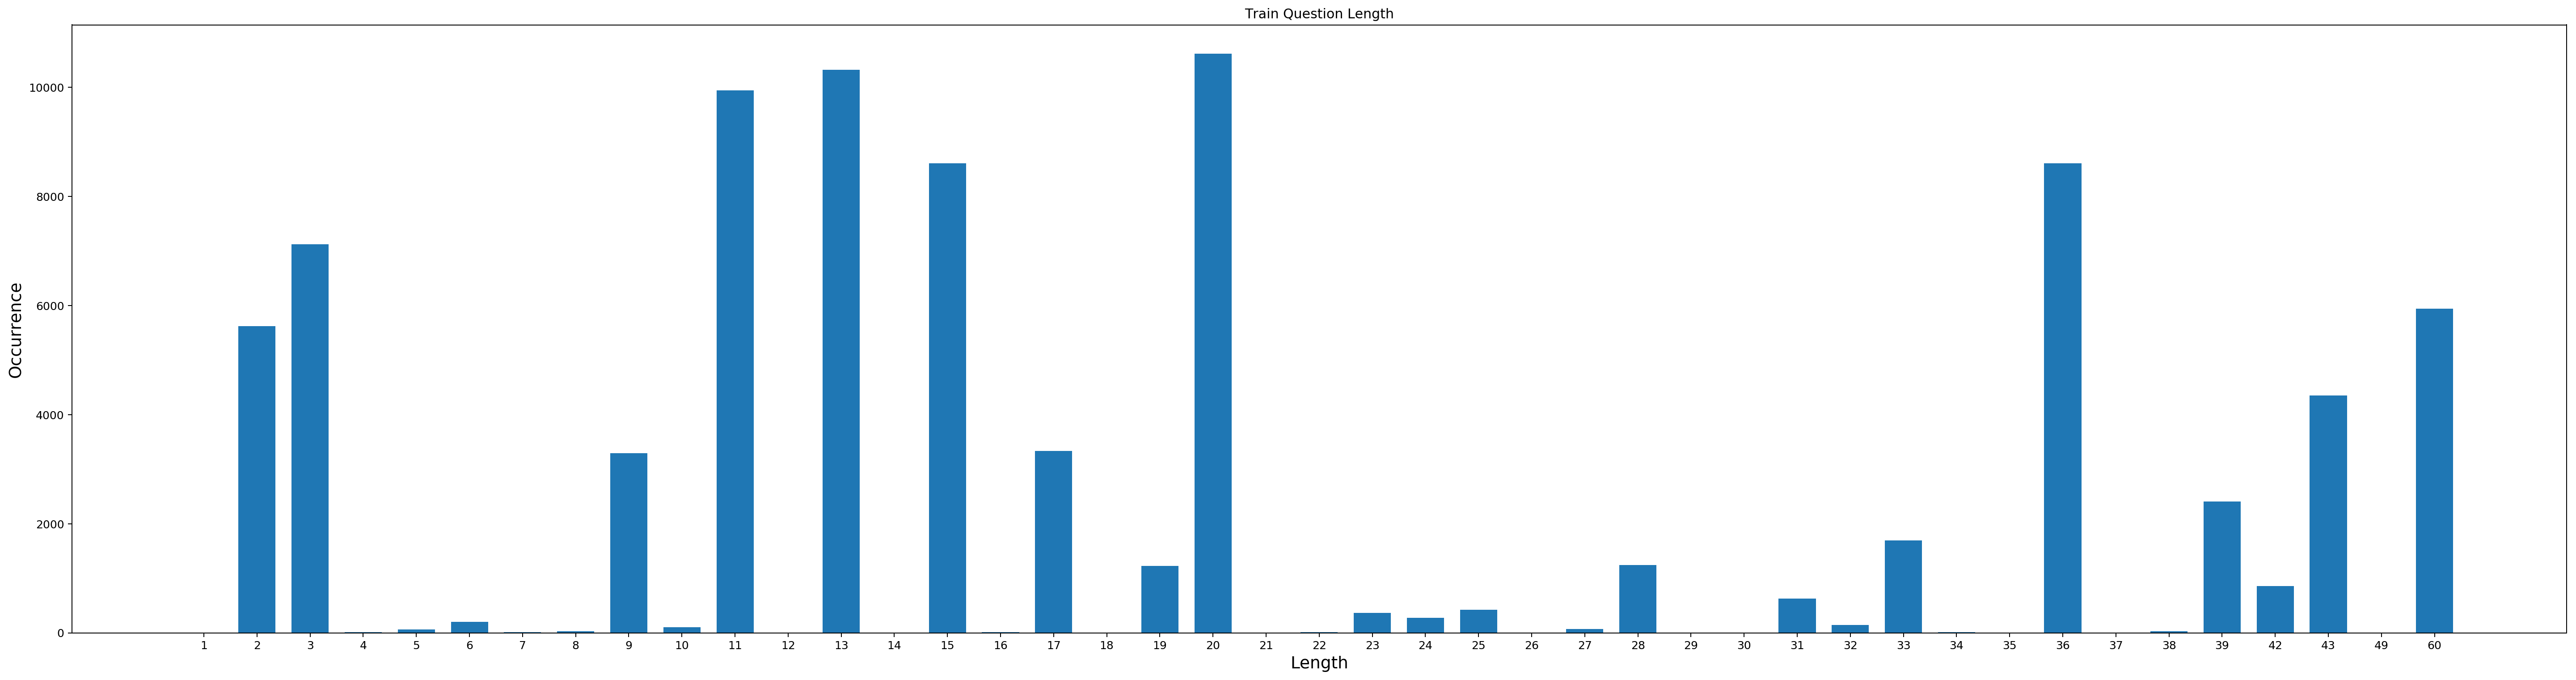

In [207]:
bar('Train Question Length', train_question_lengths, fig_size=(40, 10))

In [219]:
train_question_stats = stats(train_question_lengths)
train_question_stats

(1, 60, 22, 22.651162790697676)

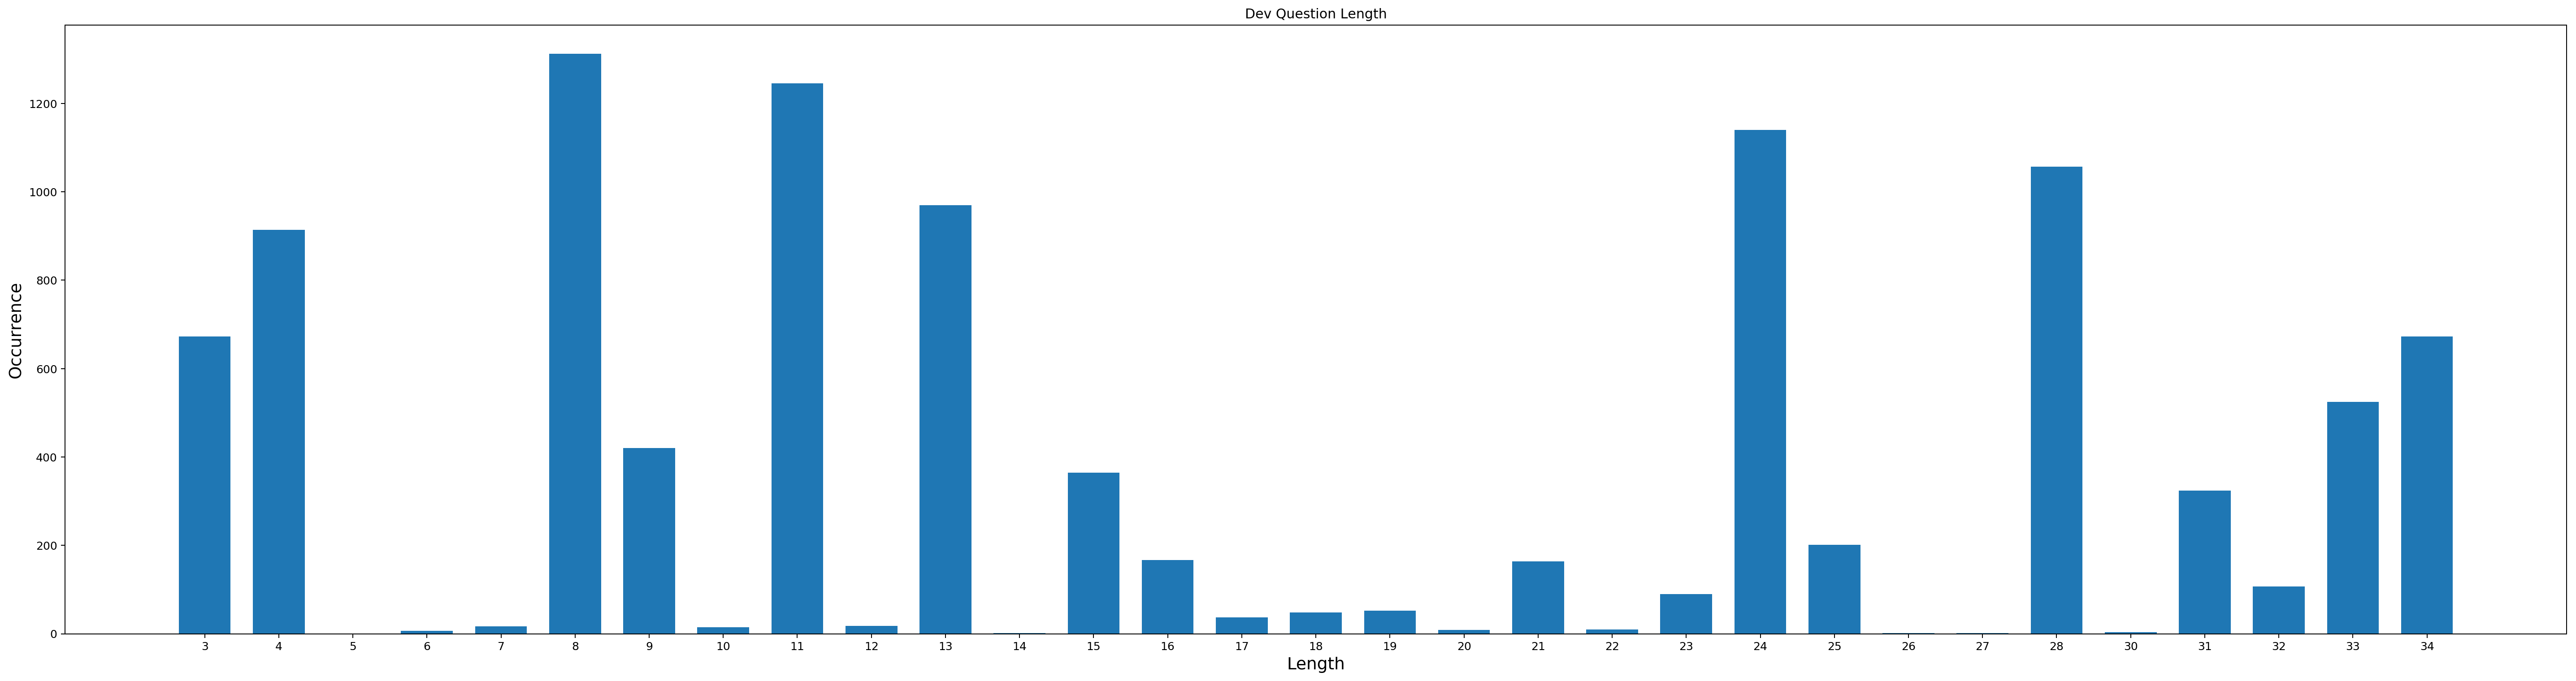

In [209]:
bar('Dev Question Length', dev_question_lengths, fig_size=(40, 10))

In [220]:
dev_question_stats = stats(dev_question_lengths)
dev_question_stats

(3, 34, 18, 18.161290322580644)

### Answers

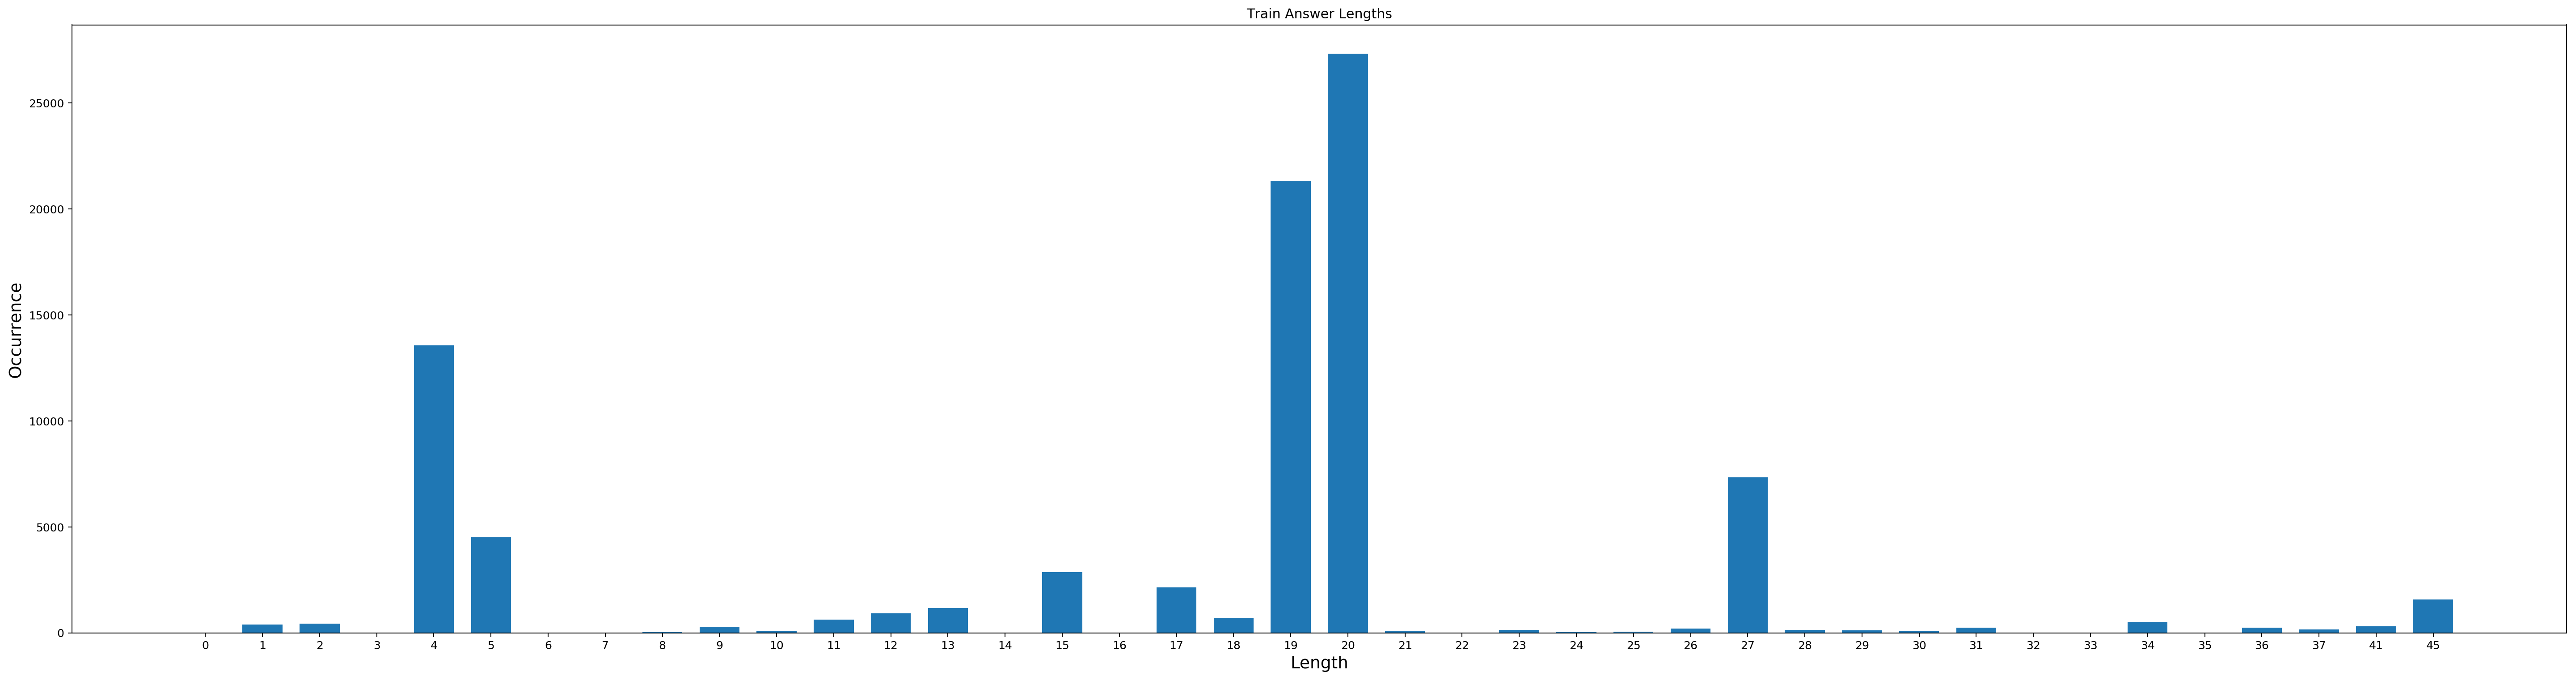

In [211]:
bar('Train Answer Lengths', train_answer_lengths, fig_size=(40, 10))

In [212]:
train_answer_stats = stats(train_answer_lengths)
train_answer_stats

(0, 45, 19.5, 19.725)

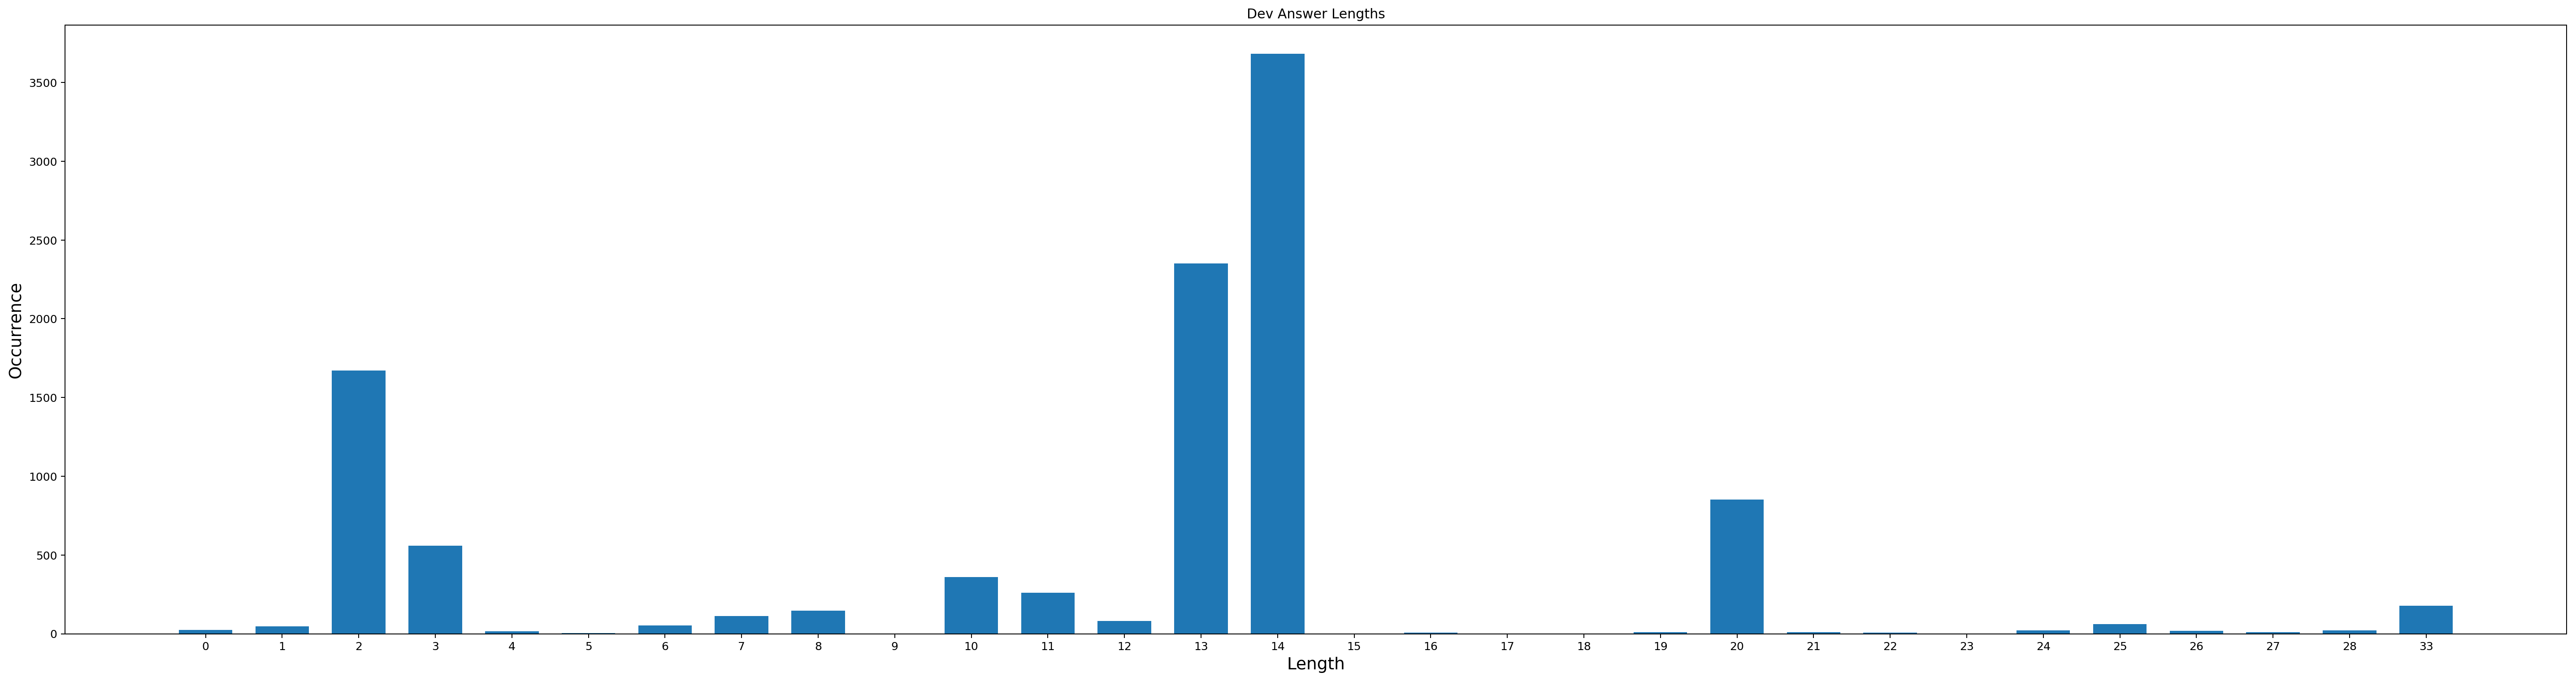

In [213]:
bar('Dev Answer Lengths', dev_answer_lengths, fig_size=(40, 10))

In [214]:
dev_answer_stats = stats(dev_answer_lengths)
dev_answer_stats

(0, 33, 14.5, 14.633333333333333)

## Answer Pointer Distributions

In [260]:
_, train_context_max, _, _ = train_contexts_stats
_, dev_context_max, _, _ = dev_contexts_stats

In [289]:
def calc_distribution(data, max_length, epsilon=1e-12):
    """ Calculates a distribution over the answer start + end pointers. """
    starts = np.zeros(max_length, dtype=np.float32)
    ends = np.zeros(max_length, dtype=np.float32)
    for query in data.values():
        answer_start = query['answer_starts']
        answer_end = query['answer_ends']

        starts[answer_start] += 1.
        ends[answer_end] += 1.
        
    starts = starts + epsilon
    starts /= len(data)
    ends = ends + epsilon
    ends /= len(data)

    return starts, ends

In [290]:
train_starts, train_ends = calc_distribution(train_answers, train_context_max)
dev_starts, dev_ends = calc_distribution(dev_answers, dev_context_max)

Text(0.5,1,'Answer Start Index Distribution')

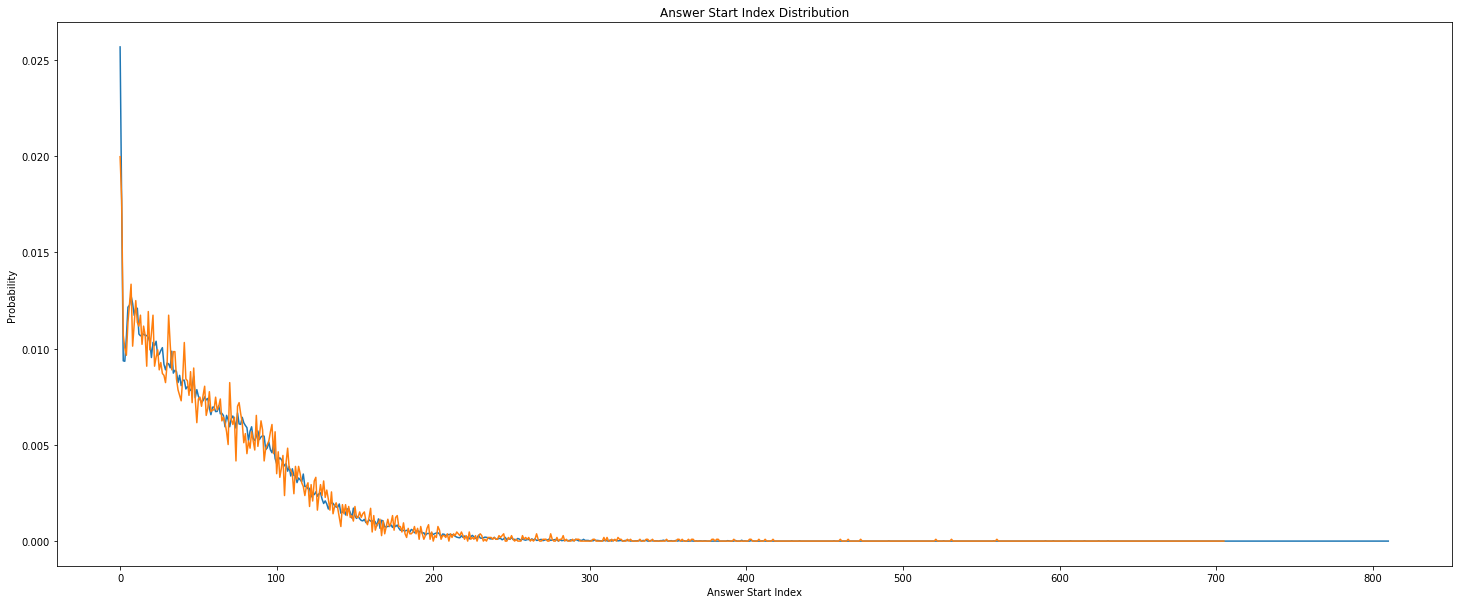

In [293]:
plt.figure(figsize=(25, 10))
plt.plot(train_starts)
plt.plot(dev_starts)
plt.ylabel('Probability')
plt.xlabel('Answer Start Index')
plt.title('Answer Start Index Distribution')

Text(0.5,1,'Answer End Index Distribution')

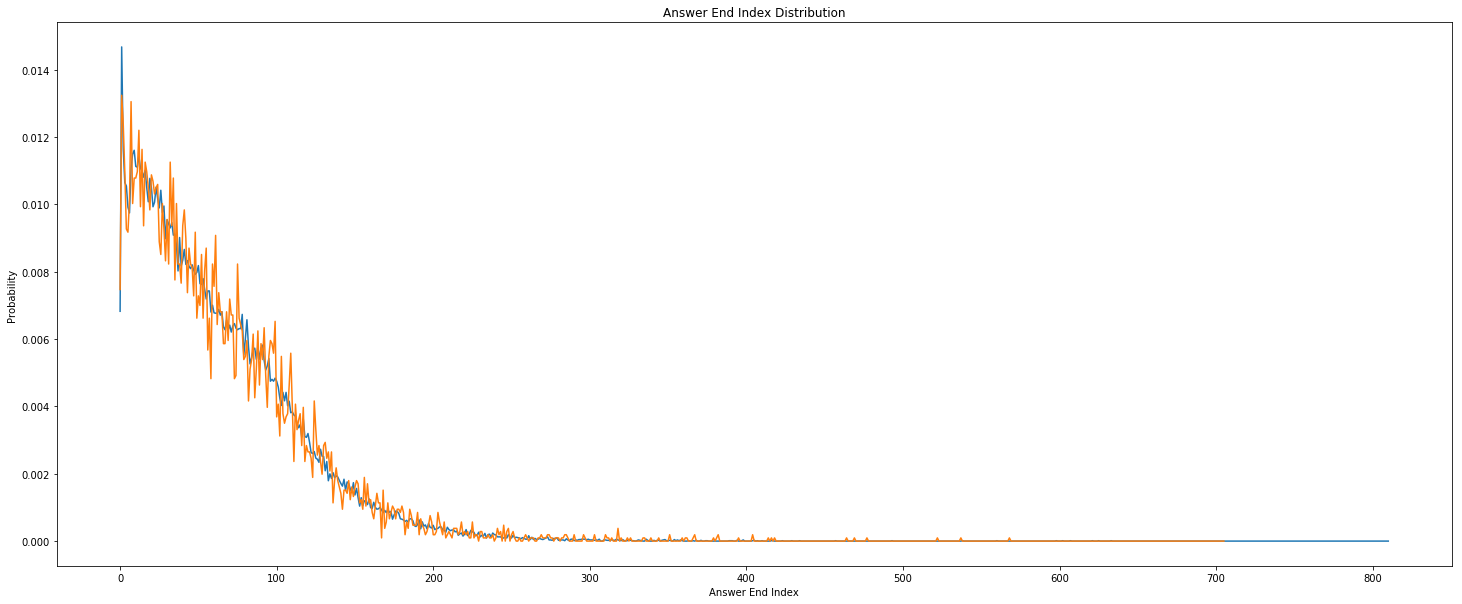

In [292]:
plt.figure(figsize=(25, 10))
plt.plot(train_ends)
plt.plot(dev_ends)
plt.ylabel('Probability')
plt.xlabel('Answer End Index')
plt.title('Answer End Index Distribution')

# Error Analysis

In [17]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv1D, Layer, Softmax, GlobalMaxPool1D, GlobalAveragePooling1D

In [3]:
test_input = tf.random_normal((32, 50, 128), dtype=tf.float32)

In [4]:
import numpy as np
from tensorly.decomposition import tucker
from tensorly.tucker_tensor import tucker_to_tensor, tucker_to_unfolded

Using numpy backend.


In [6]:
core = np.zeros((128, 128, 128), dtype=np.float32)
diag = np.random.randn(128)
for i, (x, y, z) in enumerate(zip(*np.diag_indices(128, 3))):
    core[x][y][z] = diag[i]
core = tf.constant(core)
huh = tf.random_normal((32, 400, 128), dtype=tf.float32)
q, k, v = huh, huh, huh

In [8]:
outy = tucker_to_tensor(core, [q[0], k[0], v[0]])

AttributeError: 'Tensor' object has no attribute 'ndim'

In [9]:
outy

array([[[-8.61470108e+01, -3.59474640e+01, -1.32447243e+01, ...,
         -5.83028078e+00,  2.22002530e+00,  1.24906988e+01],
        [-3.59474640e+01, -1.78013058e+01, -5.97575045e+00, ...,
          2.60054851e+00,  5.42833853e+00,  9.30002975e+00],
        [-1.32447243e+01, -5.97574949e+00, -1.32061033e+01, ...,
          3.46932578e+00,  6.99990654e+00, -1.32908974e+01],
        ...,
        [-5.83028221e+00,  2.60054779e+00,  3.46932578e+00, ...,
         -1.74473152e-02,  3.46956062e+00,  7.34513760e+00],
        [ 2.22002411e+00,  5.42833853e+00,  6.99990749e+00, ...,
          3.46956062e+00, -8.15312767e+00,  9.99705601e+00],
        [ 1.24906998e+01,  9.30002975e+00, -1.32908993e+01, ...,
          7.34513760e+00,  9.99705505e+00, -4.88307266e+01]],

       [[-3.59474602e+01, -1.78013039e+01, -5.97575092e+00, ...,
          2.60054874e+00,  5.42833662e+00,  9.30002975e+00],
        [-1.78013077e+01, -4.12992516e+01,  2.66463256e+00, ...,
          5.78084803e+00,  1.90599270e

In [8]:
def ndim(tensor):
    return len(tensor.get_shape()._dims)

def moveaxis(tensor, source, target):
    axes = list(range(ndim(tensor)))
    if source < 0: source = axes[source]
    if target < 0: target = axes[target]
    try:
        axes.pop(source)
    except IndexError:
        raise ValueError('Source should verify 0 <= source < tensor.ndim'
                             'Got %d' % source)
    try:
        axes.insert(target, source)
    except IndexError:
        raise ValueError('Destination should verify 0 <= destination < tensor.ndim'
                             'Got %d' % target)
    return tf.transpose(tensor, axes)

def unfold(tensor, mode, batch=False):
    shape = tf.shape(tensor)
    
    if batch:
        shape = (shape[0], shape[mode], -1)
        return tf.reshape(moveaxis(tensor, mode, 1), shape)
    else:
        shape = (shape[mode], -1)
        return tf.reshape(moveaxis(tensor, mode, 0), shape)

def fold(unfolded_tensor, mode, shape, batch=False):
    full_shape = list(shape)
    if batch:
        mode_dim = full_shape.pop(mode)
        full_shape.insert(1, mode_dim)
        reshape = tf.reshape(unfolded_tensor, full_shape)
        return moveaxis(reshape, 1, mode + 1)
    else:
        mode_dim = full_shape.pop(mode)
        full_shape.insert(0, mode_dim)
        return moveaxis(tf.reshape(unfolded_tensor, full_shape), 0, mode)

def mode_dot(tensor, matrix_or_vector, mode, batch=True):
    # the mode along which to fold might decrease if we take product with a vector
    fold_mode = mode
    new_shape = tf.shape(tensor)
    new_shape = [new_shape[i] for i in range(ndim(tensor))]
    
    if ndim(matrix_or_vector) == 3 and batch:
        if len(new_shape) == 3:
            new_shape = [tf.shape(matrix_or_vector)[0]] + new_shape
        new_shape[mode + 1] = tf.shape(matrix_or_vector)[1]
       # print(new_shape)
    elif ndim(matrix_or_vector) == 2:  # Tensor times matrix
        # Test for the validity of the operation
        if matrix_or_vector.shape[1] != tensor.shape[mode]:
            raise ValueError(
                    'shapes {0} and {1} not aligned in mode-{2} multiplication: {3} (mode {2}) != {4} (dim 1 of matrix)'.format(
                        tensor.shape, matrix_or_vector.shape, mode, tensor.shape[mode], matrix_or_vector.shape[1]
                    ))
        new_shape[mode] = matrix_or_vector.shape[0]
    else:
        raise ValueError('Can only take n_mode_product with a vector or a matrix.'
                             'Provided array of dimension {} not in [1, 2].'.format(T.ndim(matrix_or_vector)))

    if ndim(tensor) == 3:
        unfolded = unfold(tensor, mode)
        res = tf.tensordot(matrix_or_vector, unfolded, axes=([ndim(matrix_or_vector) - 1], [0]))
        return fold(res, fold_mode, new_shape)
    elif batch:
        unfolded = unfold(tensor, mode + 1, batch=True)
        res = tf.einsum('bij,bjk->bik', matrix_or_vector, unfolded)
        return fold(res, fold_mode, new_shape, batch=True)


def multi_mode_dot(tensor, matrix_or_vec_list, modes=None, skip=None):
    if modes is None:
        modes = range(len(matrix_or_vec_list))
    res = tensor

    # Order of mode dots doesn't matter for different modes
    # Sorting by mode shouldn't change order for equal modes
    factors_modes = sorted(zip(matrix_or_vec_list, modes), key=lambda x: x[1])
    for i, (matrix_or_vec, mode) in enumerate(factors_modes):
#         print(mode)
        res = mode_dot(res, matrix_or_vec, mode)
    return res

In [17]:
batch_n_mode = multi_mode_dot(core, [q, k, v])
batch_n_mode

<tf.Tensor 'transpose_11:0' shape=(32, 400, 400, 400) dtype=float32>

In [12]:
tensorly_tucker = tucker_to_tensor(core, [q[0], k[0], v[0]])
tensorly_tucker

array([[[-30.3333    ,   7.8143883 , -40.724937  , ..., -17.080994  ,
         -14.401972  ,  -1.3285929 ],
        [  7.8143873 ,   3.9844708 ,   1.9146541 , ...,  10.130919  ,
           8.616103  ,  -4.764201  ],
        [-40.724934  ,   1.9146541 ,  18.210127  , ..., -20.005896  ,
          -9.063348  ,   3.8804283 ],
        ...,
        [-17.080994  ,  10.1309185 , -20.0059    , ..., -15.994414  ,
         -24.111917  ,  13.467112  ],
        [-14.401972  ,   8.616103  ,  -9.063349  , ..., -24.111917  ,
           0.6188208 , -11.719779  ],
        [ -1.3285944 ,  -4.764201  ,   3.8804283 , ...,  13.4671135 ,
         -11.719779  ,  -7.70794   ]],

       [[  7.8143864 ,   3.9844708 ,   1.9146539 , ...,  10.1309185 ,
           8.616102  ,  -4.7642    ],
        [  3.9844737 , -46.425014  , -20.07224   , ...,   7.0199    ,
          20.436972  ,  25.281193  ],
        [  1.9146537 , -20.07224   , -33.44406   , ...,  -0.81297725,
           6.800644  ,  25.12119   ],
        ...,


In [18]:
close = 0

for i, (qi, ki, vi) in enumerate(zip(q, k, v)):
    tensorly_tucker = tucker_to_tensor(core, [qi, ki, vi])
    
    if np.allclose(batch_n_mode[i].numpy(), tensorly_tucker):
        close += 1

close

TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.

In [19]:
batch_n_mode

<tf.Tensor 'transpose_11:0' shape=(32, 400, 400, 400) dtype=float32>

In [20]:
splits = tf.split(batch_n_mode, 400, axis=1)
concat = tf.squeeze(tf.concat(splits, axis=-1))
concat

<tf.Tensor 'Squeeze_2:0' shape=(32, 400, 160000) dtype=float32>

## reshape = unfold(batch_n_mode, 2, batch=True).numpy()

In [26]:
np.allclose(reshape[0], concat[0])

True

In [47]:
class MultiLinearAttention(Layer):
    def __init__(self, hidden_size=128, num_heads=8, dropout=0.1, use_bias=False, **kwargs):
        """

            Args:
                hidden_size: The number of units in the final dimension of the input tensor.
                num_heads: Number of attention heads to compute, when num_heads == 1, multi-head attention == attention
                dropout: Fraction of units to drop.
                use_bias: Whether or not to use bias on the linear transformations, in Attention is All You Need no bias
                          is used but in BERT, GPT and GPT-2 it is.
                self_attention: Boolean value for whether to use self-attention on the inputs.
        """
        super(MultiLinearAttention, self).__init__(**kwargs)
        self.supports_masking = True
        self.num_heads = num_heads
        self.hidden_size = hidden_size
        self.max_seq = 400

        self.queries_layer = Conv1D(self.hidden_size, kernel_size=1, use_bias=use_bias)
        self.keys_layer = Conv1D(self.hidden_size, kernel_size=1, use_bias=use_bias)
        self.values_layer = Conv1D(self.hidden_size, kernel_size=1, use_bias=use_bias)
        self.output_layer = Conv1D(self.hidden_size, kernel_size=1, use_bias=use_bias)

        if not self.hidden_size % self.num_heads == 0:
            raise ValueError('Hidden Size {} must be divisible by the number of attention heads {} with no remainder.'
                             .format(self.hidden_size, self.num_heads))

        self.scaling_factor = 1 / num_heads
        self.dropout = Dropout(dropout)

    def build(self, input_shape):
        """ Adds the necessary weights and an optional bias variable """
        self.G = self.add_weight(name='G',
                                 shape=(self.num_heads, self.hidden_size),
                                 initializer=tf.constant_initializer(np.random.rand(self.num_heads, self.hidden_size)),
                                 trainable=True)

        super(MultiLinearAttention, self).build(input_shape)

    def compute_input_shape(self, input_shape):
        """ Gets the first two dimensions of the input (batch_size and sequence length) """
        shape = tf.shape(input_shape)
        return shape[0], shape[1]

    def split_concat(self, x, length):
        splits = tf.split(x, length, axis=1)
        concat = tf.squeeze(tf.concat(splits, axis=-1))
        return concat

    def get_core(self, i, length):
        """ For compactness and the requirement that only the diagonal of the core matrix is trainable, we
            store the diagonal of each heads core as a 1-d tensor and expanded out when used. This
            function creates a 3-d tensor filling the diagonal with the values in the 1-d tensor.

            Args:
                i: Index of the current heads tucker core to utilise.
        """
        #         diag = tf.zeros(shape=(self.hidden_size, self.hidden_size), dtype=tf.float32)
        #         core = tf.zeros(shape=(self.hidden_size, self.hidden_size, self.hidden_size, ), dtype=tf.float32)
        #         # First expansion creates a 2-order matrix with the diag from the rank-1 trainable.
        #         diag = tf.linalg.set_diag(diag, self.G[i])
        #         # Second expansion creates a 3-order matrix.
        #         core = tf.linalg.set_diag(core, diag)

        core = tf.expand_dims(tf.matrix_diag(self.G[i]), axis=2)
        core = tf.tile(core, (1, 1, length))

        return core

    def call(self, x, training=None, mask=None):
        """ Call function detailing this layers ops.
            Args:
                x: List of two input tensors of shape [batch_size, seq_length, units], if they are the same,
                   this is self-attention. First tensor treated as the 'query', second tensor as the 'memory'.
                training: Boolean flag for training mode.
                mask: A boolean mask tensor.
        """
        if isinstance(x, (tf.Tensor, tf.SparseTensor, tf.Variable)):  # Self attention -> X, Y = X, X
            x, y = x, x
        elif len(x) == 2:  # Attention between two tensors -> X, Y = X, Y
            x, y = x
        else:  # Invalid, we can only take a tensor or list of two tensors for attention.
            raise ValueError('Expected a maximum of two tensors passed to multi-head attention, got: {}'.format(len(x)))

        batch_size, length_x = self.compute_input_shape(x)
        query, key, values = self.queries_layer(x), self.keys_layer(y), self.values_layer(y)
        
        btds = []
        for i in range(0, self.num_heads):
            core = self.get_core(i, length_x)
            tucker = tf.map_fn(lambda e: tf.einsum('pqk,ip,jq,kr->ijr', core, e[0], e[1], e[2]), [query, key, values], dtype=tf.float32)
            btds.append(tucker)
        btd = tf.math.add_n(btds)
        btd *= self.scaling_factor

        btd = tf.reshape(btd, shape=(batch_size, length_x, -1))
        # Pad so that the channel dimension is defined at the maximum it can be.
        pad = tf.zeros(shape=(1, length_x, (self.hidden_size * self.max_seq) - tf.shape(btd)[2]), dtype=tf.float32)
        pad = tf.tile(pad, [batch_size, 1, 1])

        attention = tf.concat([btd, pad], axis=-1)
        attention.set_shape((None, None, self.hidden_size * self.max_seq))

        attention = self.output_layer(attention)

        return attention

In [ ]:
reinforcment learning with tetris game idea?

In [1]:
import numpy as np

c:\users\chris\anaconda3\envs\chris-dl-v2\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\chris\anaconda3\envs\chris-dl-v2\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\chris\anaconda3\envs\chris-dl-v2\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
id_array = np.random.randn(32)
id_array2 = np.random.randn(32)
test = np.concatenate([id_array, id_array2])

In [3]:
test.shape

(64,)

In [4]:
test

array([-0.19218518, -1.72033791,  0.27677072, -0.9270304 , -0.04037681,
        0.24810263, -0.47475471,  0.14456374,  1.75609611,  0.86181269,
        1.6471076 , -1.92677886, -1.10062141, -0.78547975,  0.73576662,
        0.9986631 , -0.7601045 ,  1.58382392, -1.04156099,  0.7252335 ,
        0.93942499, -1.32306692,  0.68731157,  1.09128289, -1.43379438,
        0.14431487,  1.10185602,  1.01923931, -0.07437048,  0.29099578,
       -0.35731789,  0.91876794,  1.08685394, -1.03050597,  1.12385954,
       -0.05453908,  0.22796035, -0.99002924, -1.63285287, -1.83395083,
       -1.48699875, -0.80241738, -2.09251614, -0.5803552 ,  0.02342061,
        0.70385618, -1.42752267, -0.63095541,  1.1974084 ,  1.16294457,
        0.34066351,  0.32061253,  0.96651479, -0.71836455, -0.96677163,
        0.45901607,  0.59082382,  0.13005907, -1.47269763, -1.27139751,
       -1.303743  ,  0.90321875, -0.79844812, -0.49934275])

In [5]:
test_2 = np.expand_dims(np.concatenate([id_array, id_array2]), axis=-1)
test_2.shape

(64, 1)

In [6]:
test_3 = np.random.randn(32, 100)
test_3.shape

(32, 100)

In [7]:
test_3[2]

array([ 0.37783401,  0.30756935,  1.24460163, -1.14054355,  0.1801772 ,
        0.20057519, -0.98098505, -0.99966401, -0.78709185, -2.702079  ,
       -0.26133908,  0.38139472,  1.97861154,  0.692205  , -1.47646166,
        1.00514472, -1.4246796 ,  0.9020832 ,  0.1891796 ,  1.30367674,
       -0.01598785, -1.61709192,  0.88440364, -0.94234065, -1.17039322,
       -1.594862  ,  1.51723466,  0.25637115, -1.20797571,  0.16909316,
        1.29145543,  0.22955476, -1.17583696, -0.57292824, -1.24107547,
        0.39686393,  0.42205619,  1.09174442, -0.7110548 ,  0.89662573,
       -0.77513383, -0.62421391, -2.07968596, -0.95363065, -0.74464486,
       -0.24064966, -0.55962186,  1.18260925, -0.33924676,  0.20440814,
        0.61077805,  0.98359449,  0.09891139,  1.87103169,  0.88443425,
       -0.28989899, -0.54371441, -0.75783291, -0.15701636,  1.47548392,
        0.49660245, -1.16265186, -0.24750232,  0.74318348, -0.39449376,
        1.05578519, -0.98887802,  0.62862123, -1.02101132, -0.45

In [8]:
test_index = np.arange(32)
test_index.shape

(32,)

In [9]:
np.take_along_axis(test_3, np.expand_dims(test_index, axis=1), axis=1).shape

(32, 1)

In [18]:
sample_size = 32
sample_1 = np.random.sample(sample_size)
sample_2 = np.random.sample(sample_size)
sample_3 = np.random.sample(sample_size)

In [19]:
stacked_samples = np.stack([sample_1, sample_2, sample_3])

In [20]:
stacked_samples

array([[0.59710534, 0.24570187, 0.37689874, 0.21681497, 0.14665955,
        0.44191737, 0.17556387, 0.65573411, 0.16766262, 0.70407661,
        0.44017813, 0.9347478 , 0.24562001, 0.57255406, 0.9523353 ,
        0.21738081, 0.49910656, 0.76323127, 0.41025934, 0.58820426,
        0.47928172, 0.31628892, 0.71448321, 0.67712244, 0.44438745,
        0.17769596, 0.75002936, 0.53720069, 0.53620784, 0.38145314,
        0.58844004, 0.65388812],
       [0.41250795, 0.12471541, 0.86345416, 0.52780426, 0.83114723,
        0.19211416, 0.08508307, 0.51756746, 0.25754013, 0.17863023,
        0.72029869, 0.0693783 , 0.50865354, 0.8599821 , 0.78377367,
        0.96619005, 0.96797745, 0.71180676, 0.69799837, 0.69740463,
        0.88436061, 0.58021798, 0.26219491, 0.86874224, 0.78537659,
        0.69642705, 0.27045601, 0.54502218, 0.04949372, 0.92534422,
        0.2898365 , 0.19639083],
       [0.83459064, 0.19752531, 0.26112898, 0.64604979, 0.17362078,
        0.01611776, 0.44803896, 0.3136307 , 0.7282

In [24]:
np.argmax(stacked_samples, axis=0)

array([2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 1, 0, 0], dtype=int64)

In [25]:
stacked_samples.shape

(3, 32)

In [26]:
max_args = np.argmax(stacked_samples, axis=0)
[stacked_samples[m, i] for i, m in enumerate(max_args)]

[0.8345906350570769,
 0.2457018739172595,
 0.8634541605029326,
 0.6460497896921946,
 0.8311472267834944,
 0.44191737345889504,
 0.44803896200523186,
 0.6557341052757703,
 0.7282337460811789,
 0.704076612270117,
 0.7202986907979336,
 0.9347477999262839,
 0.7200386102507254,
 0.8599820972134571,
 0.9616377770304242,
 0.9661900546488853,
 0.9679774478646528,
 0.7632312676957957,
 0.6979983700785722,
 0.6974046329243381,
 0.8843606140115505,
 0.9572980986116617,
 0.7144832069707445,
 0.9756763520688915,
 0.8919235328971716,
 0.6964270453613115,
 0.750029356256935,
 0.545022182804515,
 0.6777273748360447,
 0.9253442221073401,
 0.5884400350726784,
 0.6538881210191905]

In [83]:
test_probs = [np.random.random_sample((1, 32, 100,))] + [np.random.random_sample((1, 32, 50,))]

In [85]:
np.stack(test_probs, axis=1)

ValueError: all input arrays must have the same shape

In [77]:
test_probs[:, 0]

TypeError: list indices must be integers or slices, not tuple

In [8]:
max_context_size = 400
max_answer_size = 30
max_x_len = 50

In [10]:
upper_tri_mat = np.triu(
    np.ones([max_context_size, max_context_size], dtype='float32') -
            np.triu(
                np.ones([max_context_size, max_context_size], dtype='float32'),
                k=max_answer_size))

# [0, 0][max_x_len, max_x_len]

In [16]:
upper_tri_mat[0, :max_x_len].shape

(50,)

In [18]:
upper_tri_mat = tf.slice(
      np.triu(
          np.ones([max_context_size, max_context_size], dtype='float32') -
          np.triu(
              np.ones([max_context_size, max_context_size], dtype='float32'),
              k=max_answer_size)), [0, 0], [max_x_len, max_x_len])

In [ ]:
upper_tri_mat.sh